In [71]:
import nibabel as nib 
import nilearn.plotting as niplt 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [6]:
parcel_data=np.load('data/full_parcel_level_data.npy')
preferences=np.zeros((1000,2))
for i in range(1000):
    idx=np.argmax(parcel_data[:,:,i].mean(axis=1))
    preferences[i,0]=idx+1
    preferences[i,1]=parcel_data[:,:,i].mean(axis=1)[idx]


In [74]:
parc_name="/jukebox/griffiths/bert-brains/black_data/Schaefer1000_3mm.nii.gz"
parcellation=nib.load(parc_name).get_fdata().astype('int')
argmax_volume=np.zeros(parcellation.shape)
for p in range(1000):
    argmax_volume[np.where(parcellation==p+1)]=preferences[p,0]

performance_volume=np.zeros(parcellation.shape)
for p in range(1000):
    performance_volume[np.where(parcellation==p+1)]=preferences[p,1]
affine=nib.load(parc_name).affine 


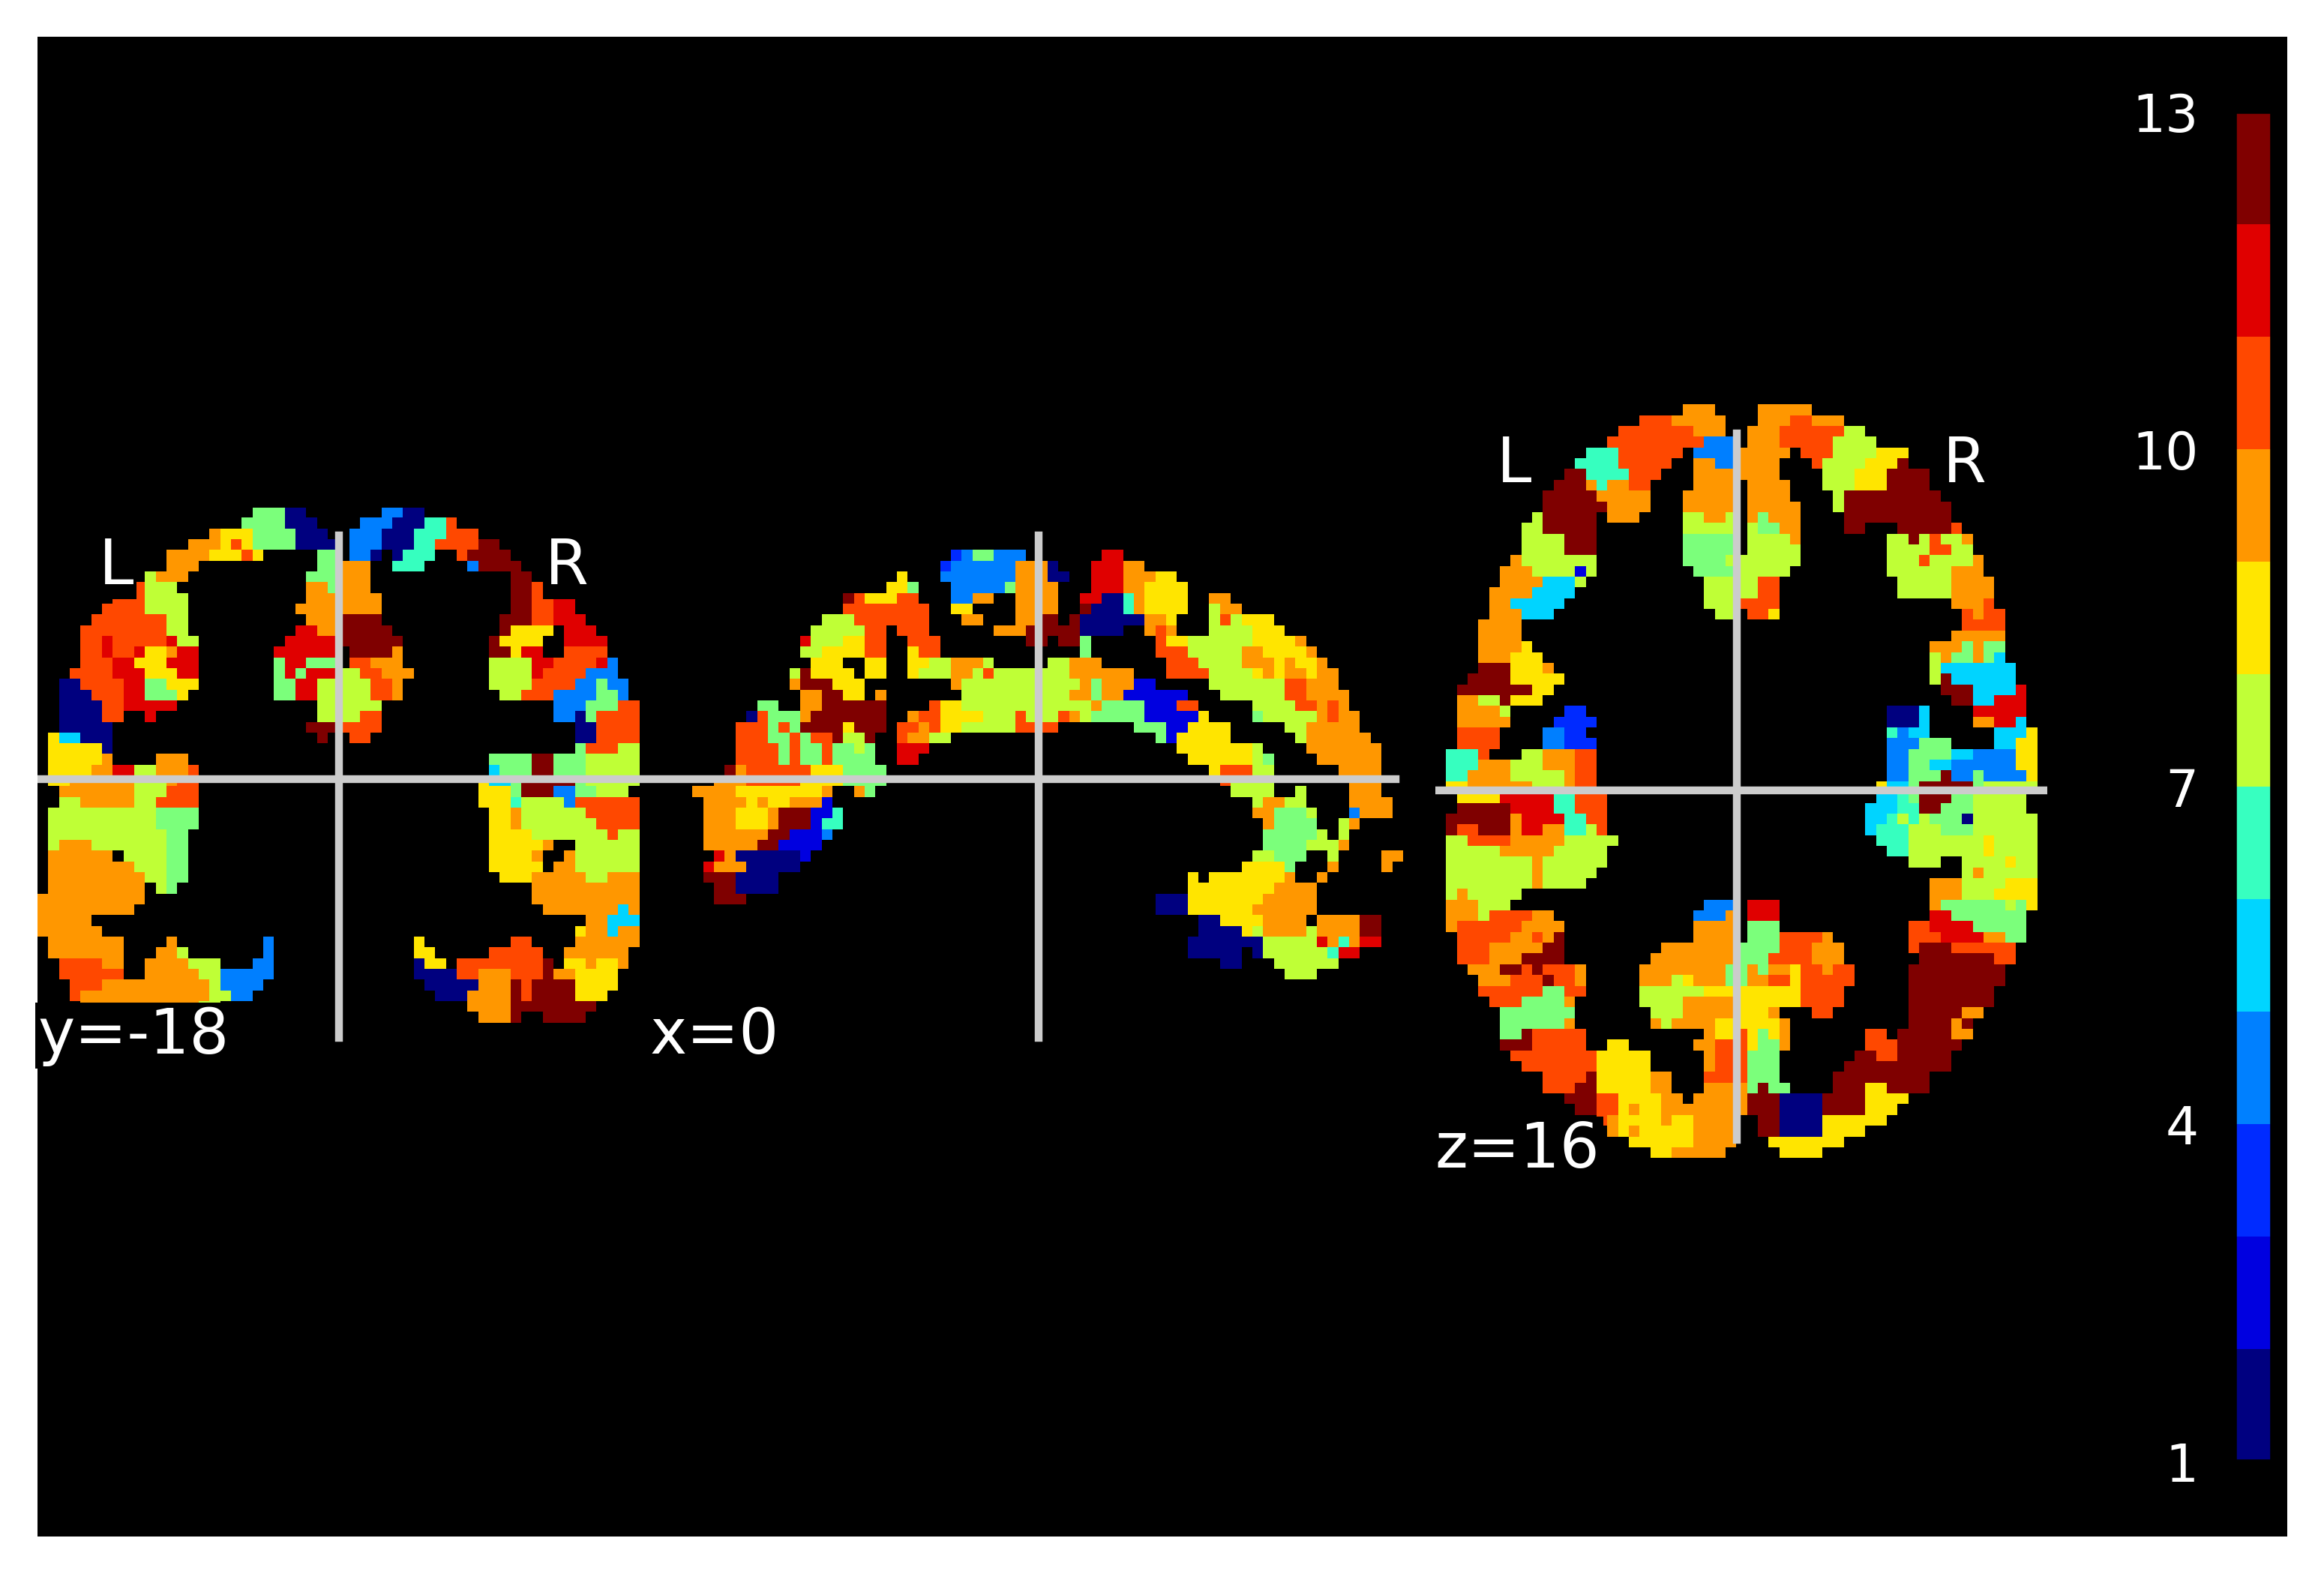

In [73]:
#Most preferred layer
from pylab import *

fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(argmax_volume,affine),cmap = cm.get_cmap('jet', 13),figure=fig,colorbar=True,threshold=0.9,vmax=13,black_bg=True)


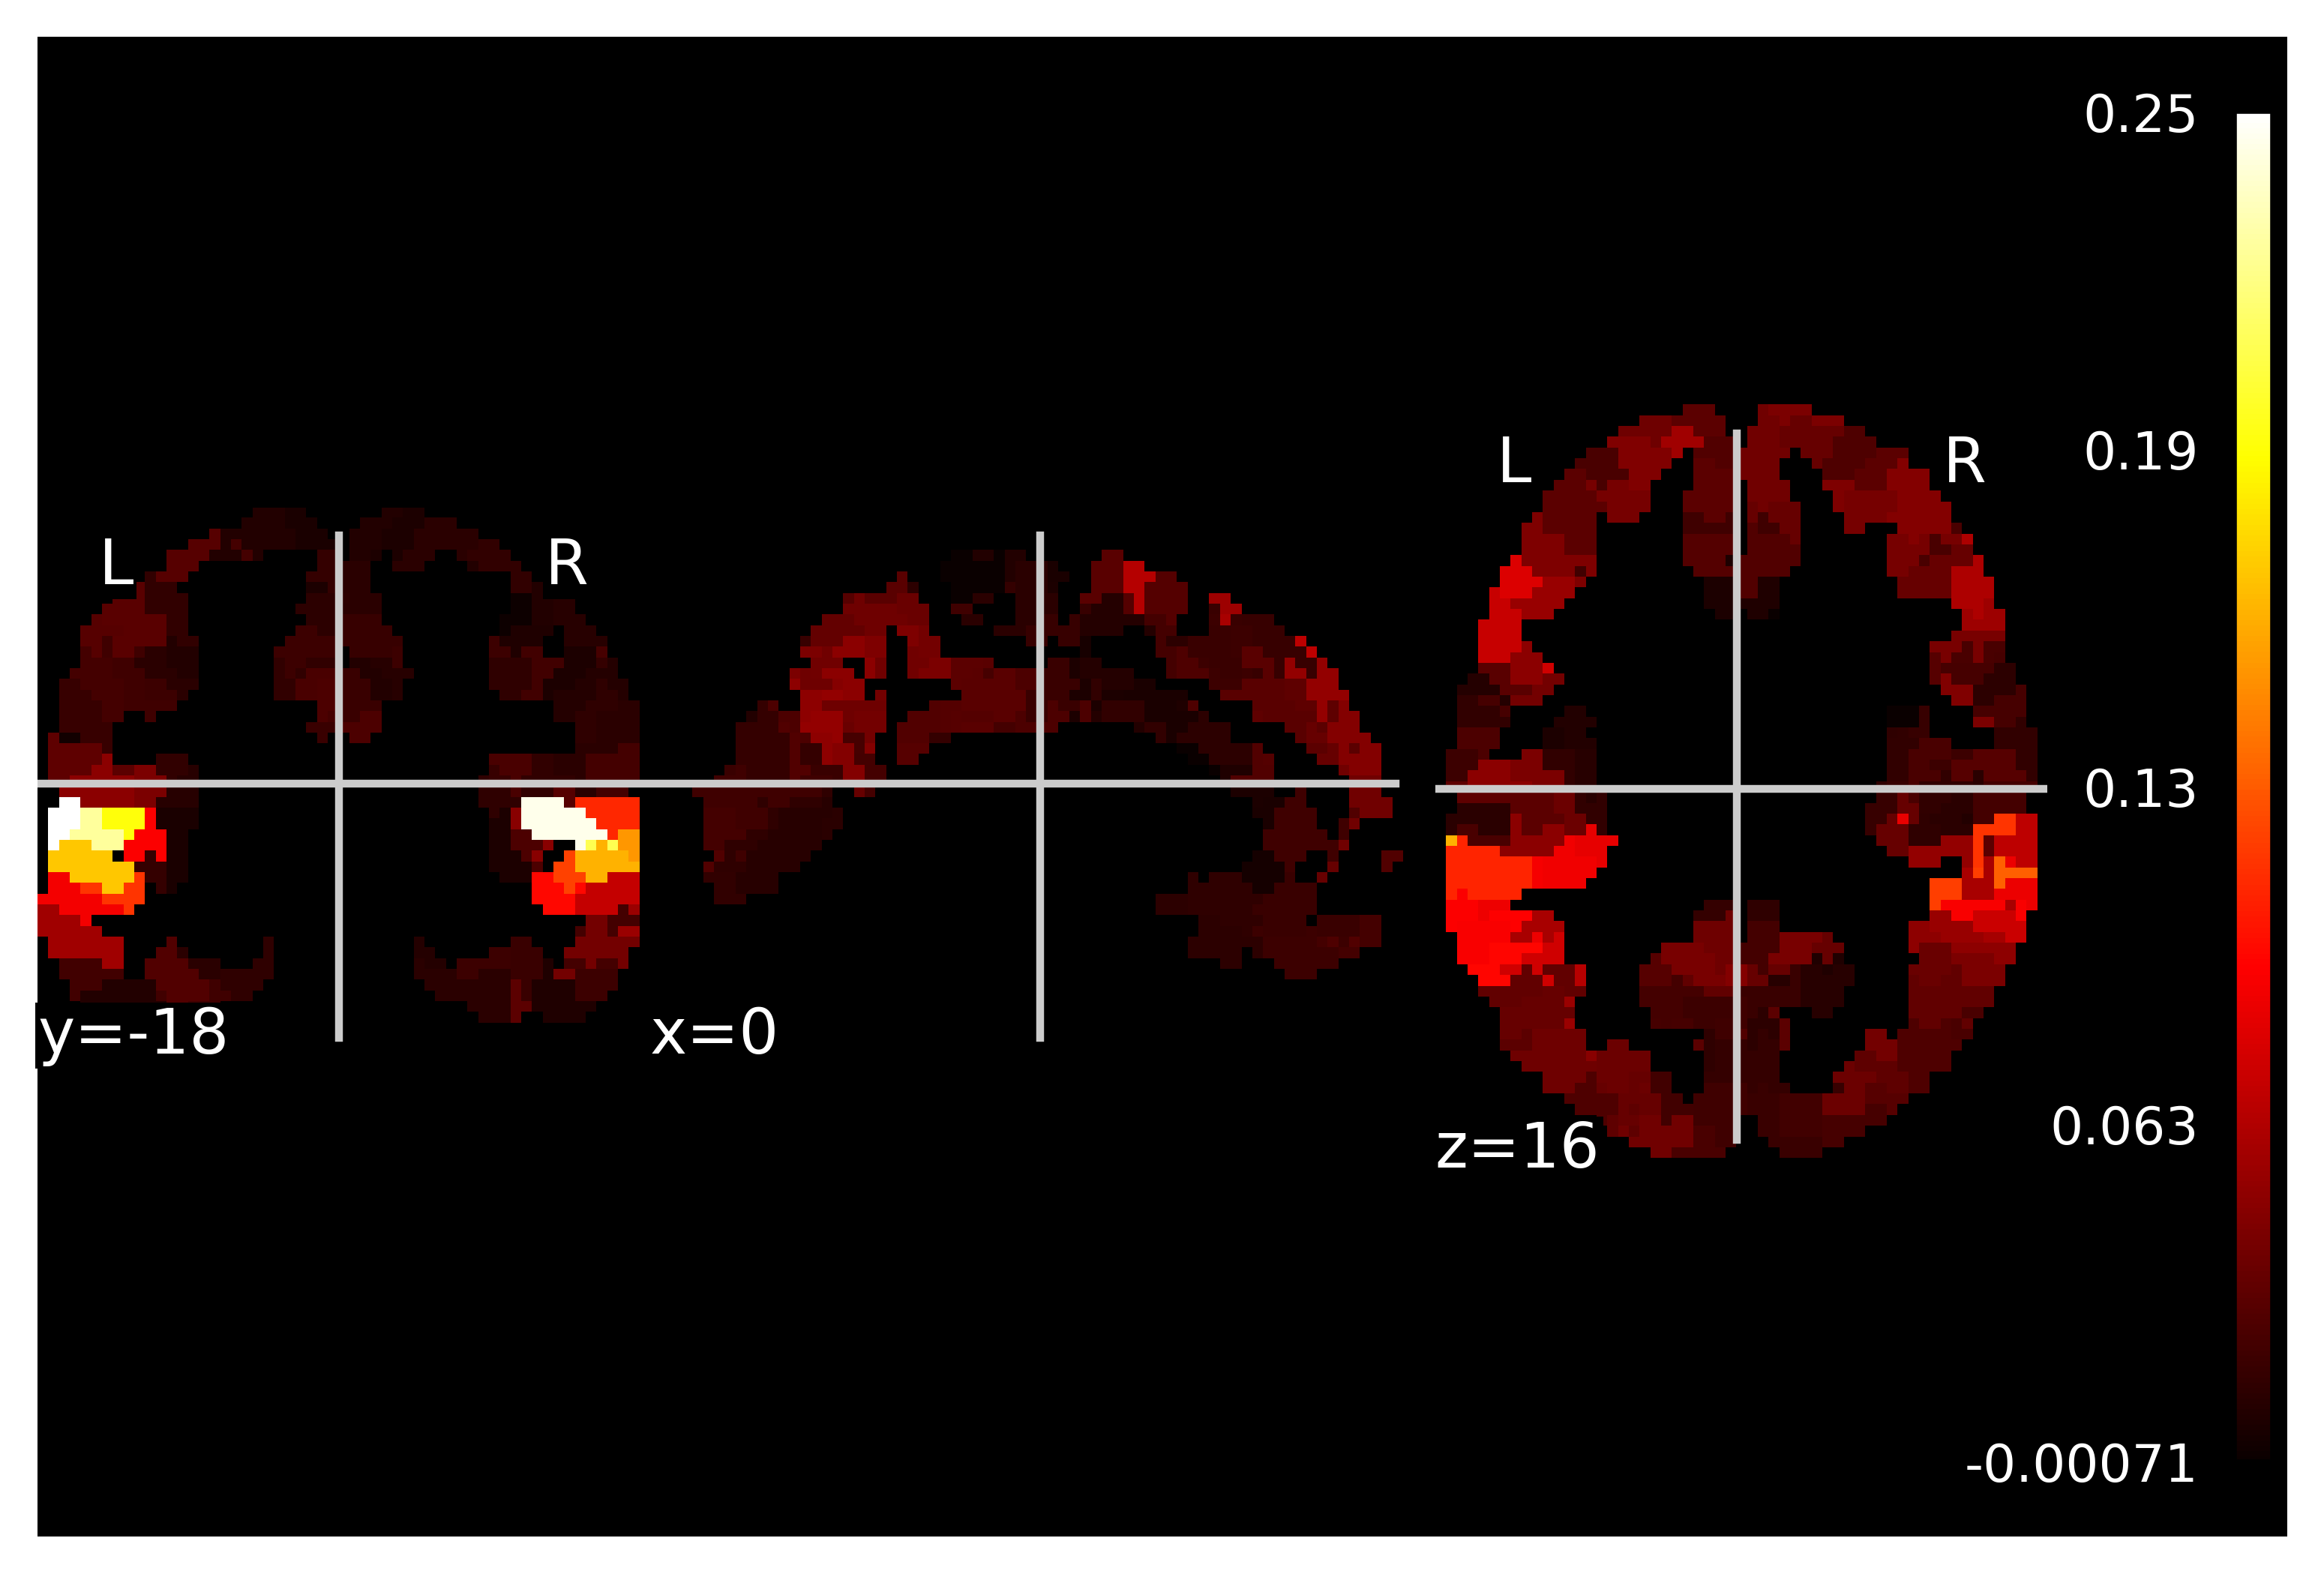

In [78]:
#Performances for most preferred layer

from pylab import *

fig=plt.figure(dpi=500)
x=niplt.plot_img(nib.Nifti1Image(performance_volume,affine),figure=fig,colorbar=True,black_bg=True,cut_coords=(0,-18,16),threshold=1e-9,cmap='hot')
#cbar=fig.colorbar(x)


(array([ 45.,   6.,  26.,  42.,  30., 172., 113., 240., 154., 172.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <a list of 10 Patch objects>)

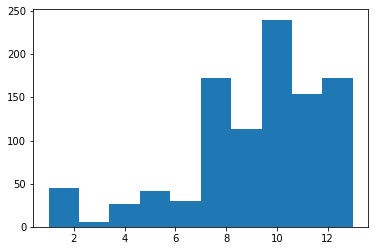

In [79]:
plt.hist(preferences[:,0].flatten())